# IIC-2433 Minería de Datos UC

- Versiones de librerías, python 3.8.10

- numpy 1.20.3
- sklearn 1.0.2
- matplotlib 3.5.2


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, mixture

dataset = datasets.make_moons(n_samples=1000, noise=0.05) # usar noise 0.2 para fusionar los clusters
X, _ = dataset

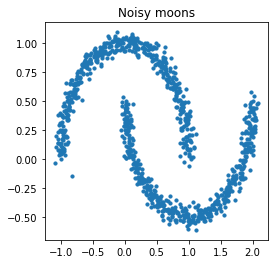

In [2]:
plt.figure(figsize=(4, 4))
plt.title("Noisy moons")
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.show()

In [3]:
# fit a Gaussian Mixture Model with two components
gmm = mixture.GaussianMixture(n_components=2, covariance_type="full")
gmm.fit(X)

GaussianMixture(n_components=2)

Ver más configuraciones en: https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html

In [4]:
# display predicted scores by the model as a contour plot
x = np.linspace(-2.5, 2.5)
y = np.linspace(-2.5, 2.5)
G_X, G_Y = np.meshgrid(x, y)
XX = np.array([G_X.ravel(), G_Y.ravel()]).T
Z = -gmm.score_samples(XX)
Z = Z.reshape(G_X.shape)

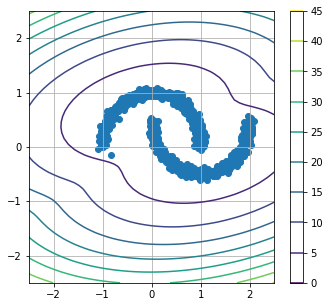

In [5]:
plt.figure(figsize=(5.5, 5))
CS = plt.contour(G_X, G_Y, Z)
CB = plt.colorbar(CS)
plt.scatter(X[:, 0], X[:, 1])
plt.grid()
plt.show()

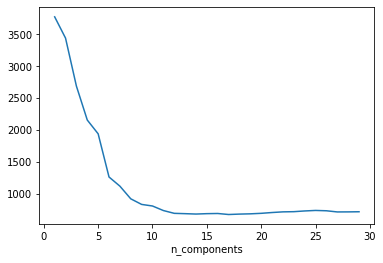

In [6]:
n_components = np.arange(1, 30)
models = [mixture.GaussianMixture(n, covariance_type='full', random_state=0).fit(X) for n in n_components]

plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.xlabel('n_components');

In [7]:
aics = np.asarray([m.aic(X) for m in models])
np.where(aics == np.amin(aics))[0][0]

16

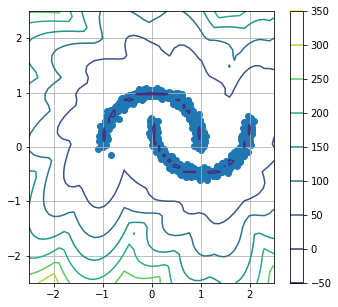

In [8]:
# fit a Gaussian Mixture Model with two components
gmm = mixture.GaussianMixture(n_components=16, covariance_type="full")
gmm.fit(X)
# display predicted scores by the model as a contour plot
x = np.linspace(-2.5, 2.5)
y = np.linspace(-2.5, 2.5)
G_X, G_Y = np.meshgrid(x, y)
XX = np.array([G_X.ravel(), G_Y.ravel()]).T
Z = -gmm.score_samples(XX)
Z = Z.reshape(G_X.shape)
plt.figure(figsize=(5.5, 5))
CS = plt.contour(G_X, G_Y, Z)
CB = plt.colorbar(CS)
plt.scatter(X[:, 0], X[:, 1])
plt.grid()
plt.show()

Reconstrucción con PCA y GMM

In [9]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

digits = load_digits()
pca = PCA(0.99, whiten=True)
X = pca.fit_transform(digits.data)
X.shape

(1797, 41)

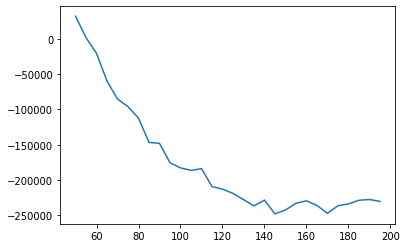

In [10]:
n_components = np.arange(50, 200, 5)
models = [mixture.GaussianMixture(n, covariance_type='full') for n in n_components]
aics = [model.fit(X).aic(X) for model in models]
plt.plot(n_components, aics);

In [11]:
gmm = mixture.GaussianMixture(145, covariance_type='full')
gmm.fit(X)
print(gmm.converged_)

True


In [12]:
data_new = gmm.sample(100)
data_new[0].shape

(100, 41)

In [13]:
synthetic_data = pca.inverse_transform(data_new[0])

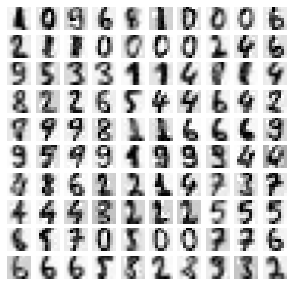

In [14]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(5, 5))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(synthetic_data[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")

